In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
#np.bool = np.bool_

In [ ]:
!pip install autogluon.timeseries
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 823.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
df = pd.read_csv('/content/drive/My Drive/internship/df_ref2.csv')
df.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial3_refrigerator,DE_KN_residential3_refrigerator,DE_KN_residential4_refrigerator,DE_KN_residential5_refrigerator,year,weekofyear,dayofweek,month,hour,quarter
0,2014-12-11 17:45:00,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,17,4
1,2014-12-11 18:00:00,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,1
2,2014-12-11 18:15:00,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,2
3,2014-12-11 18:30:00,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,3
4,2014-12-11 18:45:00,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,2014,50,4,12,18,4


In [ ]:
columns_to_process_ref = [
    'DE_KN_industrial3_refrigerator',
    'DE_KN_residential3_refrigerator',
    'DE_KN_residential4_refrigerator',
    'DE_KN_residential5_refrigerator'
]

for column in columns_to_process_ref:
    if column in df.columns:
        # Create a temporary DataFrame for the current column
        temp_df = df[['utc_timestamp', column]].dropna().copy()

        # Calculate daily values
        temp_df['daily_' + column] = temp_df[column].diff()

        # Handle the first daily value
        temp_df.loc[temp_df.index[0], 'daily_' + column] = temp_df.loc[temp_df.index[0], column]

        # Merge the new daily values back into the original DataFrame
        df = df.merge(temp_df[['utc_timestamp', 'daily_' + column]], on='utc_timestamp')

df.head()

,utc_timestamp,cet_cest_timestamp,DE_KN_industrial3_refrigerator,DE_KN_residential3_refrigerator,DE_KN_residential4_refrigerator,DE_KN_residential5_refrigerator,year,weekofyear,dayofweek,month,hour,quarter,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
0,2015-10-26 11:30:00,2015-10-26T12:30:00+0100,4.928,127.624,4.474,0.000,2015,44,1,10,11,3,0.001,0.001,0.0,0.000
1,2015-10-26 11:45:00,2015-10-26T12:45:00+0100,4.933,127.631,4.474,0.000,2015,44,1,10,11,4,0.005,0.007,0.0,0.000
2,2015-10-26 12:00:00,2015-10-26T13:00:00+0100,4.955,127.644,4.474,0.001,2015,44,1,10,12,1,0.022,0.013,0.0,0.001
3,2015-10-26 12:15:00,2015-10-26T13:15:00+0100,4.965,127.654,4.474,0.019,2015,44,1,10,12,2,0.010,0.010,0.0,0.018
4,2015-10-26 12:30:00,2015-10-26T13:30:00+0100,4.966,127.654,4.474,0.048,2015,44,1,10,12,3,0.001,0.000,0.0,0.029


In [ ]:
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)
df.head()

,cet_cest_timestamp,DE_KN_industrial3_refrigerator,DE_KN_residential3_refrigerator,DE_KN_residential4_refrigerator,DE_KN_residential5_refrigerator,year,weekofyear,dayofweek,month,hour,quarter,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
utc_timestamp,,,,,,,,,,,,,,,
2015-10-26 11:30:00,2015-10-26T12:30:00+0100,4.928,127.624,4.474,0.000,2015,44,1,10,11,3,0.001,0.001,0.0,0.000
2015-10-26 11:45:00,2015-10-26T12:45:00+0100,4.933,127.631,4.474,0.000,2015,44,1,10,11,4,0.005,0.007,0.0,0.000
2015-10-26 12:00:00,2015-10-26T13:00:00+0100,4.955,127.644,4.474,0.001,2015,44,1,10,12,1,0.022,0.013,0.0,0.001
2015-10-26 12:15:00,2015-10-26T13:15:00+0100,4.965,127.654,4.474,0.019,2015,44,1,10,12,2,0.010,0.010,0.0,0.018
2015-10-26 12:30:00,2015-10-26T13:30:00+0100,4.966,127.654,4.474,0.048,2015,44,1,10,12,3,0.001,0.000,0.0,0.029


In [ ]:
df = df.drop(columns= ['cet_cest_timestamp','DE_KN_industrial3_refrigerator',	'DE_KN_residential3_refrigerator'	,'DE_KN_residential4_refrigerator',	'DE_KN_residential5_refrigerator',	'year'	,'weekofyear',	'dayofweek'	,'month',	'hour',	'quarter'], axis = 1)
df.head()

,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
utc_timestamp,,,,
2015-10-26 11:30:00,0.001,0.001,0.0,0.000
2015-10-26 11:45:00,0.005,0.007,0.0,0.000
2015-10-26 12:00:00,0.022,0.013,0.0,0.001
2015-10-26 12:15:00,0.010,0.010,0.0,0.018
2015-10-26 12:30:00,0.001,0.000,0.0,0.029


In [ ]:
# Extract columns for forecasting
columns_to_forecast = [
    'daily_DE_KN_industrial3_refrigerator',
    'daily_DE_KN_residential3_refrigerator',
    'daily_DE_KN_residential4_refrigerator',
    'daily_DE_KN_residential5_refrigerator'
]

In [ ]:
start_date = df.index.min() + pd.DateOffset(months=13)
filtered_df = df[df.index >= start_date]


In [ ]:
filtered_df.head()

,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
utc_timestamp,,,,
2016-11-26 11:30:00,0.017,0.002,0.000,0.001
2016-11-26 11:45:00,0.016,0.000,0.001,0.023
2016-11-26 12:00:00,0.016,0.000,0.000,0.029
2016-11-26 12:15:00,0.016,0.007,0.013,0.028
2016-11-26 12:30:00,0.017,0.012,0.015,0.015


In [ ]:
# Reset the index to turn the timestamp into a column
filtered_df = filtered_df.reset_index()

# Melt the DataFrame to long format
melted_df = filtered_df.melt(id_vars=['utc_timestamp'], var_name='item_id', value_name='target')

# Rename the 'utc_timestamp' column to 'timestamp'
melted_df = melted_df.rename(columns={'utc_timestamp': 'timestamp'})

# Reorder the columns to match the required format
final_df = melted_df[['item_id', 'timestamp', 'target']]


In [ ]:
final_df.head()

,item_id,timestamp,target
0,daily_DE_KN_industrial3_refrigerator,2016-11-26 11:30:00,0.017
1,daily_DE_KN_industrial3_refrigerator,2016-11-26 11:45:00,0.016
2,daily_DE_KN_industrial3_refrigerator,2016-11-26 12:00:00,0.016
3,daily_DE_KN_industrial3_refrigerator,2016-11-26 12:15:00,0.016
4,daily_DE_KN_industrial3_refrigerator,2016-11-26 12:30:00,0.017


In [ ]:
final_df = TimeSeriesDataFrame(final_df)

In [ ]:
# Define the prediction length and split the data
prediction_length = 48

In [ ]:
# Determine the end of the training period
train_end = final_df.index.get_level_values('timestamp').max() - pd.Timedelta(hours=prediction_length)

# Create train and test datasets manually
train_data = final_df[final_df.index.get_level_values('timestamp') <= train_end]
test_data = final_df[final_df.index.get_level_values('timestamp') > train_end]

print("Original data time range:")
print(final_df.index.get_level_values('timestamp').min(), final_df.index.get_level_values('timestamp').max())

# Verify the ranges
print("Train data time range:")
print(train_data.index.get_level_values('timestamp').min(), train_data.index.get_level_values('timestamp').max())

print("Test data time range:")
print(test_data.index.get_level_values('timestamp').min(), test_data.index.get_level_values('timestamp').max())

Original data time range:
2016-11-26 11:30:00 2017-01-04 19:45:00
Train data time range:
2016-11-26 11:30:00 2017-01-02 19:45:00
Test data time range:
2017-01-02 20:00:00 2017-01-04 19:45:00


In [ ]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data, presets="chronos_tiny",
)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels/ag-20240820_190633'
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          0
Memory Avail:       11.39 GB / 12.67 GB (89.8%)
Disk Space Avail:   72.46 GB / 107.72 GB (67.3%)
Setting presets to: chronos_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: '15T'
Provided train_data has 14344 rows, 4 ti

In [ ]:
predictions = predictor.predict(train_data)

Model not specified in predict, will default to the model with the best validation score: Chronos[tiny]


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

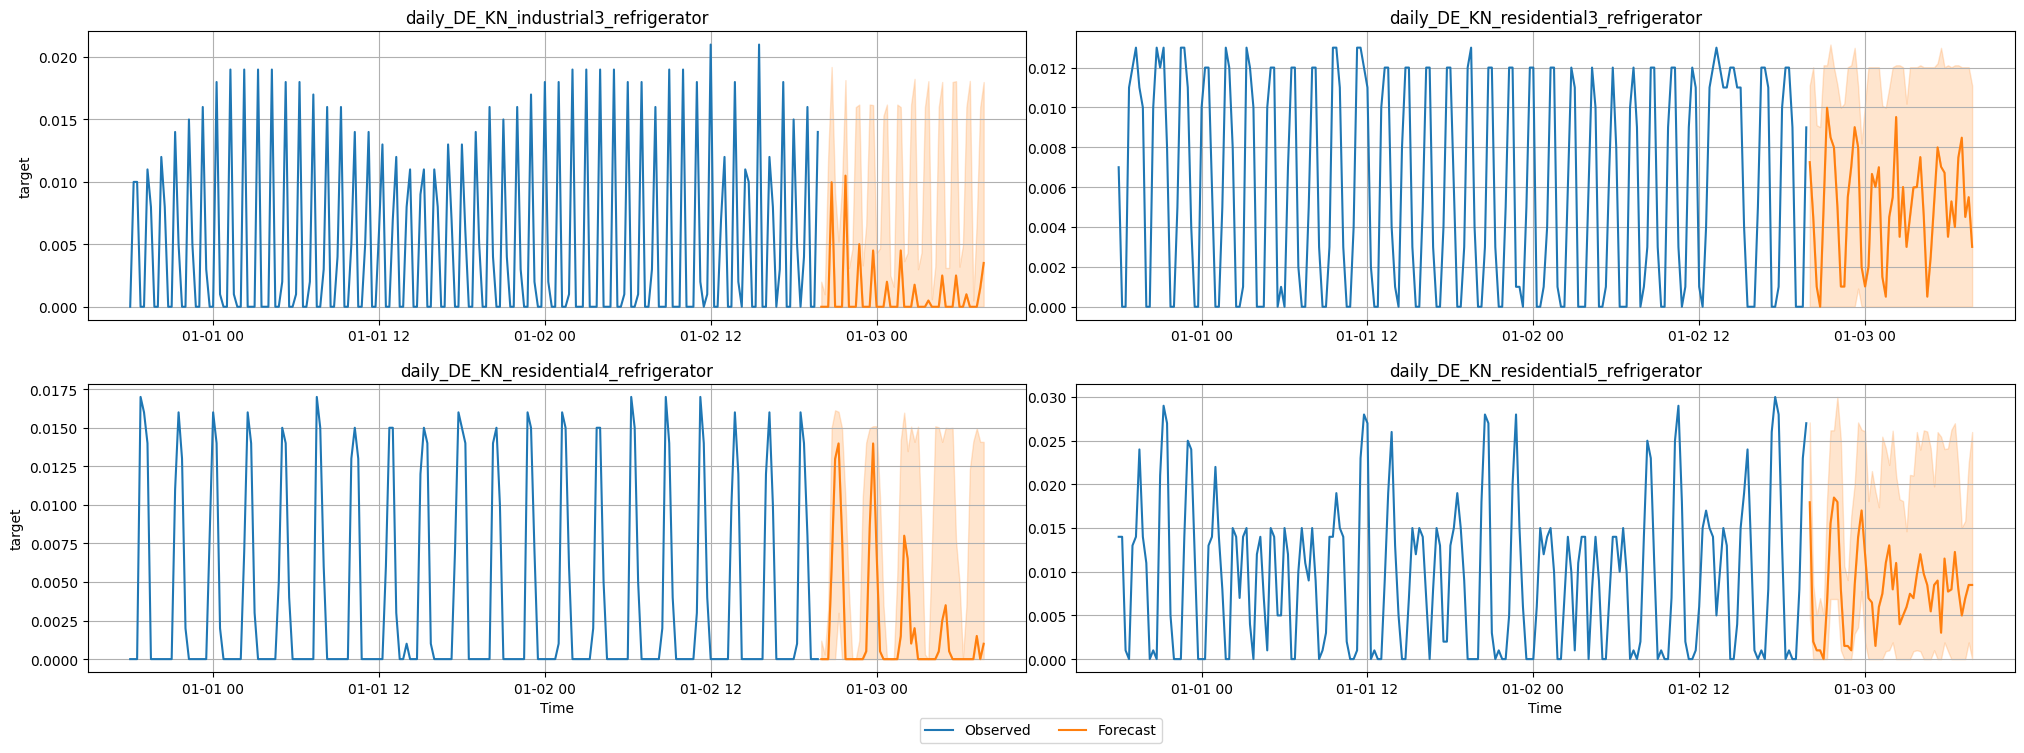

In [ ]:

predictor.plot(
    data= train_data,
    predictions=predictions,
    item_ids=["daily_DE_KN_industrial3_refrigerator", "daily_DE_KN_residential3_refrigerator",'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator'],
    max_history_length=200,
);

In [ ]:
'''# Initialize and fit the predictor
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data,
    hyperparameters={
        "Chronos": {
            "model_path": "tiny",
            "batch_size": 32,
            "device": "cpu"
        }
    },
    skip_model_selection=False,
    verbosity=0
)

'''

'# Initialize and fit the predictor\npredictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(\n    train_data,\n    hyperparameters={\n        "Chronos": {\n            "model_path": "tiny",\n            "batch_size": 32,\n            "device": "cpu"\n        }\n    },\n    skip_model_selection=False,\n    verbosity=0\n)\n\n'

In [ ]:
# Evaluate the model on the test data
neg_evaluation_result = predictor.evaluate(
    data=test_data,
    metrics=['MAE',
 'MAPE',
 'MASE',
 'MSE',
 'RMSE',
 'RMSLE',
 'RMSSE',
 'SMAPE',
 'SQL',
 'WAPE',
 'WQL'],
    display=True  # Set to True to print results directly
)

# Print evaluation metrics
print(neg_evaluation_result)

{'MAE': -0.005862136057635775, 'MAPE': -1.1030283899268982, 'MASE': -0.847568168270023, 'MSE': -5.19522079698112e-05, 'RMSE': -0.007207788008107009, 'RMSLE': -0.0071423791628655985, 'RMSSE': -0.7350243030478318, 'SMAPE': -1.2878468031535146, 'SQL': -0.6069538133693537, 'WAPE': -0.957083437981361, 'WQL': -0.6857513972307351}


In [ ]:
# Multiply each value in the result dict by -1
evaluation_result = {metric: -value for metric, value in neg_evaluation_result.items()}

# Print the modified evaluation metrics
print("Evaluation Result:")
print(evaluation_result)

import json

print(json.dumps(evaluation_result, indent=4))

Evaluation Result:
{'MAE': 0.005862136057635775, 'MAPE': 1.1030283899268982, 'MASE': 0.847568168270023, 'MSE': 5.19522079698112e-05, 'RMSE': 0.007207788008107009, 'RMSLE': 0.0071423791628655985, 'RMSSE': 0.7350243030478318, 'SMAPE': 1.2878468031535146, 'SQL': 0.6069538133693537, 'WAPE': 0.957083437981361, 'WQL': 0.6857513972307351}
{
    "MAE": 0.005862136057635775,
    "MAPE": 1.1030283899268982,
    "MASE": 0.847568168270023,
    "MSE": 5.19522079698112e-05,
    "RMSE": 0.007207788008107009,
    "RMSLE": 0.0071423791628655985,
    "RMSSE": 0.7350243030478318,
    "SMAPE": 1.2878468031535146,
    "SQL": 0.6069538133693537,
    "WAPE": 0.957083437981361,
    "WQL": 0.6857513972307351
}


In [ ]:
!pip install uv
!uv pip install -q autogluon.timeseries --system
!uv pip uninstall -q torchaudio torchvision torchtext --system # fix incompatible package versions on Colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 44.9 MB/s eta 0:00:00


In [ ]:
final_df.head()

target
item_id                              timestamp                  
daily_DE_KN_industrial3_refrigerator 2016-11-26 11:30:00   0.017
                                     2016-11-26 11:45:00   0.016
                                     2016-11-26 12:00:00   0.016
                                     2016-11-26 12:15:00   0.016
                                     2016-11-26 12:30:00   0.017

In [ ]:
final_df

target
item_id                               timestamp                  
daily_DE_KN_industrial3_refrigerator  2016-11-26 11:30:00   0.017
                                      2016-11-26 11:45:00   0.016
                                      2016-11-26 12:00:00   0.016
                                      2016-11-26 12:15:00   0.016
                                      2016-11-26 12:30:00   0.017
...                                                           ...
daily_DE_KN_residential5_refrigerator 2017-01-04 18:45:00   0.027
                                      2017-01-04 19:00:00   0.023
                                      2017-01-04 19:15:00   0.006
                                      2017-01-04 19:30:00   0.000
                                      2017-01-04 19:45:00   0.000

[15112 rows x 1 columns]

In [ ]:
prediction_length = 48
train_data, test_data = final_df.train_test_split(prediction_length)

In [ ]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data,
    hyperparameters={
        "Chronos": {
            "model_path": "tiny",
            "batch_size": 32,
            "device": "cpu"
        }
    },
    skip_model_selection=False,
    verbosity=0,
)

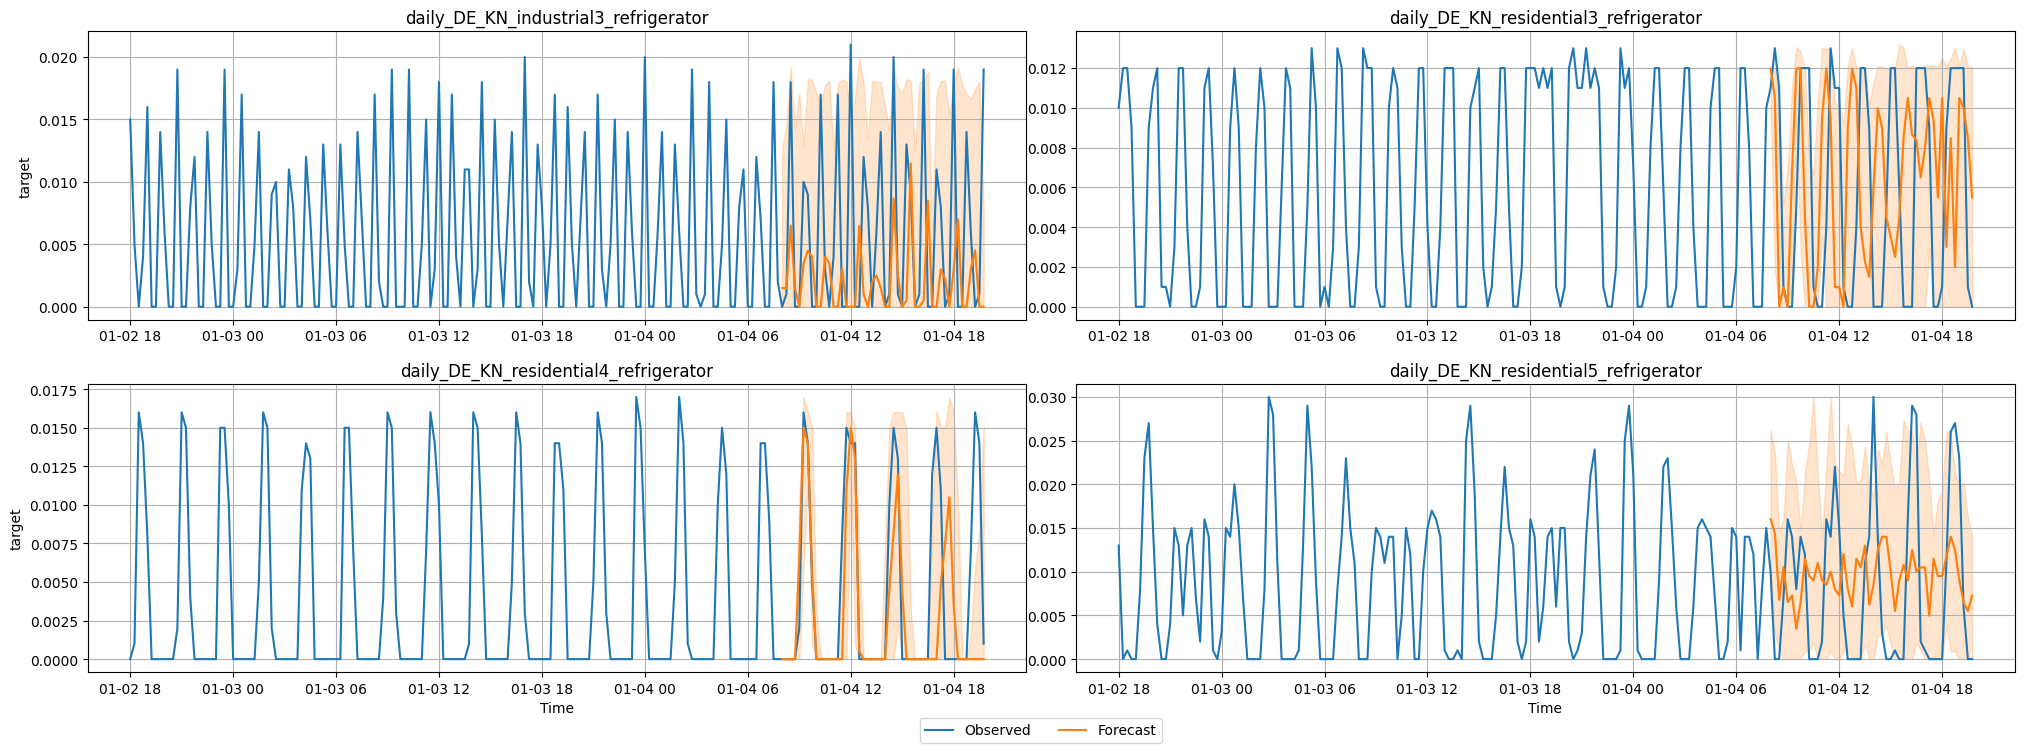

In [ ]:
predictions = predictor.predict(train_data)
predictor.plot(
    data=final_df,
    predictions=predictions,
    item_ids=["daily_DE_KN_industrial3_refrigerator", "daily_DE_KN_residential3_refrigerator",'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator'],
    max_history_length=200,
);

In [ ]:
train_data

target
item_id                               timestamp                  
daily_DE_KN_industrial3_refrigerator  2016-11-26 11:30:00   0.017
                                      2016-11-26 11:45:00   0.016
                                      2016-11-26 12:00:00   0.016
                                      2016-11-26 12:15:00   0.016
                                      2016-11-26 12:30:00   0.017
...                                                           ...
daily_DE_KN_residential5_refrigerator 2017-01-04 06:45:00   0.014
                                      2017-01-04 07:00:00   0.012
                                      2017-01-04 07:15:00   0.000
                                      2017-01-04 07:30:00   0.008
                                      2017-01-04 07:45:00   0.015

[14920 rows x 1 columns]

In [ ]:
test_data

target
item_id                               timestamp                  
daily_DE_KN_industrial3_refrigerator  2016-11-26 11:30:00   0.017
                                      2016-11-26 11:45:00   0.016
                                      2016-11-26 12:00:00   0.016
                                      2016-11-26 12:15:00   0.016
                                      2016-11-26 12:30:00   0.017
...                                                           ...
daily_DE_KN_residential5_refrigerator 2017-01-04 18:45:00   0.027
                                      2017-01-04 19:00:00   0.023
                                      2017-01-04 19:15:00   0.006
                                      2017-01-04 19:30:00   0.000
                                      2017-01-04 19:45:00   0.000

[15112 rows x 1 columns]

In [ ]:
test_data.head()

target
item_id                              timestamp                  
daily_DE_KN_industrial3_refrigerator 2016-11-26 11:30:00   0.017
                                     2016-11-26 11:45:00   0.016
                                     2016-11-26 12:00:00   0.016
                                     2016-11-26 12:15:00   0.016
                                     2016-11-26 12:30:00   0.017

In [ ]:
predictions.head()

mean  \
item_id                              timestamp                       
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  0.001150   
                                     2017-01-04 20:15:00  0.000655   
                                     2017-01-04 20:30:00  0.012597   
                                     2017-01-04 20:45:00  0.006911   
                                     2017-01-04 21:00:00  0.000309   

                                                                   0.1  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  7.454219e-11   
                                     2017-01-04 20:45:00  7.454219e-11   
                                     2017-01-04 21:00:00  7.454219e-11   

                                                                   0.2  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  7.454219e-11   
                                     2017-01-04 20:45:00  7.454219e-11   
                                     2017-01-04 21:00:00  7.454219e-11   

                                                                   0.3  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  1.130562e-02   
                                     2017-01-04 20:45:00  7.119801e-04   
                                     2017-01-04 21:00:00  7.454219e-11   

                                                                   0.4  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  1.465427e-02   
                                     2017-01-04 20:45:00  1.995109e-03   
                                     2017-01-04 21:00:00  7.454219e-11   

                                                                   0.5  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  1.746698e-02   
                                     2017-01-04 20:45:00  2.503666e-03   
                                     2017-01-04 21:00:00  7.454219e-11   

                                                                   0.6  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  1.799510e-02   
                                     2017-01-04 20:45:00  4.608310e-03   
                                     2017-01-04 21:00:00  7.454219e-11   

                                                                   0.7  \
item_id                              timestamp                           
daily_DE_KN_industrial3_refrigerator 2017-01-04 20:00:00  7.454219e-11   
                                     2017-01-04 20:15:00  7.454219e-11   
                                     2017-01-04 20:30:00  1.799510e-02   
                                     2017-01-04 20:45:00  1.272566e-02   
             

In [ ]:
# Evaluate model and get all metrics
evaluation_result2 = predictor.evaluate(test_data, metrics=['WQL', 'MAE', 'MSE', 'RMSE', 'MAPE', 'sMAPE'])

# Print evaluation metrics
print(evaluation_result2)


{'WQL': -0.6857513972307351, 'MAE': -0.005862136057635775, 'MSE': -5.19522079698112e-05, 'RMSE': -0.007207788008107009, 'MAPE': -1.1030283899268982, 'SMAPE': -1.2878468031535146}


In [ ]:
# Multiply each value in the result dict by -1
negated_evaluation_result2 = {metric: -value for metric, value in evaluation_result2.items()}

# Print the modified evaluation metrics
print("Negated Evaluation Result:")
print(negated_evaluation_result2)

Negated Evaluation Result:
{'WQL': 0.6857513972307351, 'MAE': 0.005862136057635775, 'MSE': 5.19522079698112e-05, 'RMSE': 0.007207788008107009, 'MAPE': 1.1030283899268982, 'SMAPE': 1.2878468031535146}
